# Heart Failure Prediction(95% ACC)

## Task #1: Import libraries

In [25]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Task #2: Import and peek at the dataset


In [26]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [27]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:
x=df.iloc[:,range(0,12)]
y=df['DEATH_EVENT']


<AxesSubplot:>

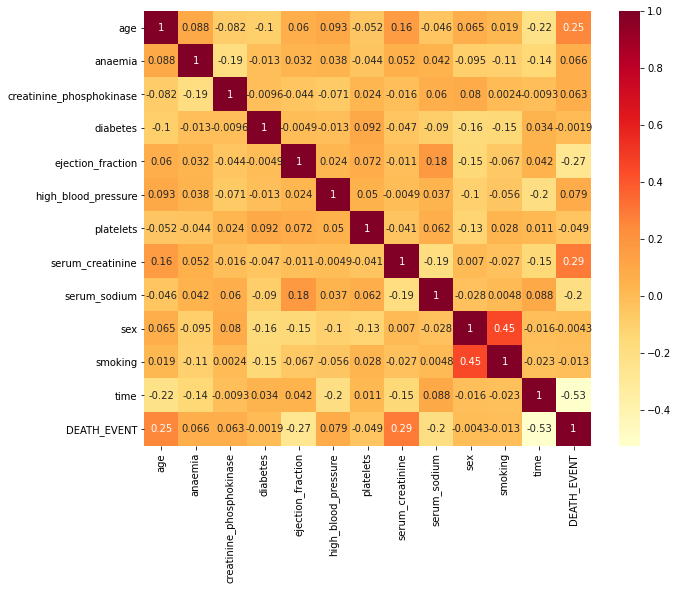

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap ="YlOrRd",annot=True)

## Task #3: Split dataset into train and test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2,test_size=0.2)

## Task #4: Train a Random Forest Classifier


In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20, random_state=0)

## Task #5: Assess trained model performance

In [32]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.917


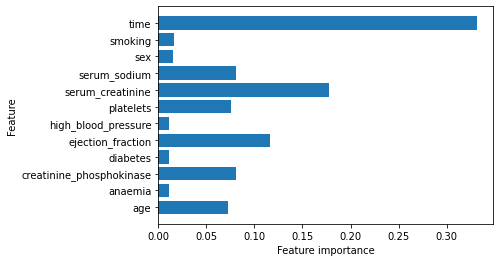

In [33]:
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

## Task #6: Train a Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

## Task #7: Assess trained model performance

In [35]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.950
